In [1]:
import pytesseract
import cv2
import time
import HelperFunc
from selenium import webdriver
import matplotlib.pyplot as plt
import numpy as np

In [138]:
import cv2
import numpy as np

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image, i):
    return cv2.medianBlur(image,i)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
def detect_signature(image):
    vis = image.copy()
    mser = cv2.MSER_create()
    regions = mser.detectRegions(image)
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
    xs = []
    ys = []
    for hull in hulls:
        x,y,w,h = cv2.boundingRect(hull)
        xmin, ymin, xmax, ymax = x,y,x+w,y+h
        xs.append(xmin)
        xs.append(xmax)
        ys.append(ymin)
        ys.append(ymax)
    xmin_ = min(xs)
    xmax_ = max(xs)
    ymin_ = min(ys)
    ymax_ = max(ys)
    xmin_, ymin_, xmax_, ymax_
    roi = image[ymin_:ymax_, xmin_:xmax_]
    return roi

def colorThreshold(img, rbg_threshold = (60,60,60)):
    """
    Return Binary Image which is thresholded by thr rbg pixel vales 
    given in rbg_threshold i.e. If pixel is > thres assign 1
    and if pixel is < thres assing 0
    args:
          img - img to be thresholded
          rbg_threshold - (r,g,b)
    """
    temp = np.zeros(img.shape)
    rflags_h = img[:,:]>rbg_threshold[0]
#     gflags_h = img[:,:,1]>rbg_threshold[1]
#     bflags_h = img[:,:,2]>rbg_threshold[2]
    
    temp[:,:][rflags_h] = 1
#     temp[:,:,1][gflags_h] = 1
#     temp[:,:,2][bflags_h] = 1
    return temp

In [298]:
img  = cv2.imread("imgs/tests/im11.jpg", 0)

In [300]:
thotsu = thresholding(img)

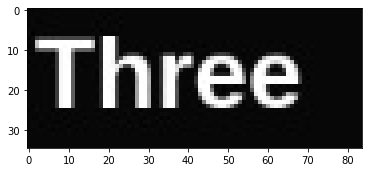

In [301]:
plt.imshow(img, cmap = 'gray')

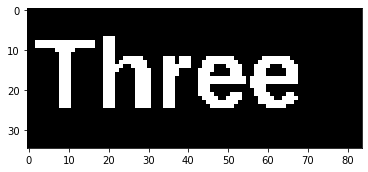

In [305]:
plt.imshow(thotsu, cmap = 'gray')

In [306]:
tmp = np.abs(thotsu.astype( int) - 255)

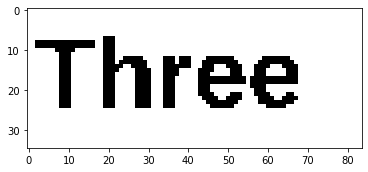

In [307]:
plt.imshow(tmp, cmap='gray')

In [308]:
tmp = np.array(tmp).astype('uint8')

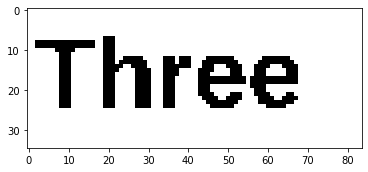

In [309]:
plt.imshow(tmp, cmap = 'gray')

In [310]:
custom_config = r'--oem 3 --psm 6'
str1 = pytesseract.image_to_string(tmp, config=custom_config)

In [311]:
str1

'Three\n\x0c'